In [1]:
%%capture
## compile PyStokes for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [3]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, pystokes, time, matplotlib as mpl

def timeTaken(Np):
    b, vs, eta = 1.0, 1.0, 0.1;    r = 2*np.linspace(-3*Np, 3*Np, 3*Np)
    p, v       = np.ones(3*Np), np.zeros(3*Np)
    RBM = pystokes.wallBounded.Rbm(radius=b, particles=Np, viscosity=eta)
    V3t = p;    t1 = time.perf_counter();    RBM.propulsionT3t(v, r, p)
    return time.perf_counter() - t1

xP  = np.arange(2000, 21000, 2000)
tP1 = np.zeros(np.size(xP))

for i in range(np.size(xP)):
    tP1[i]=timeTaken(xP[i])

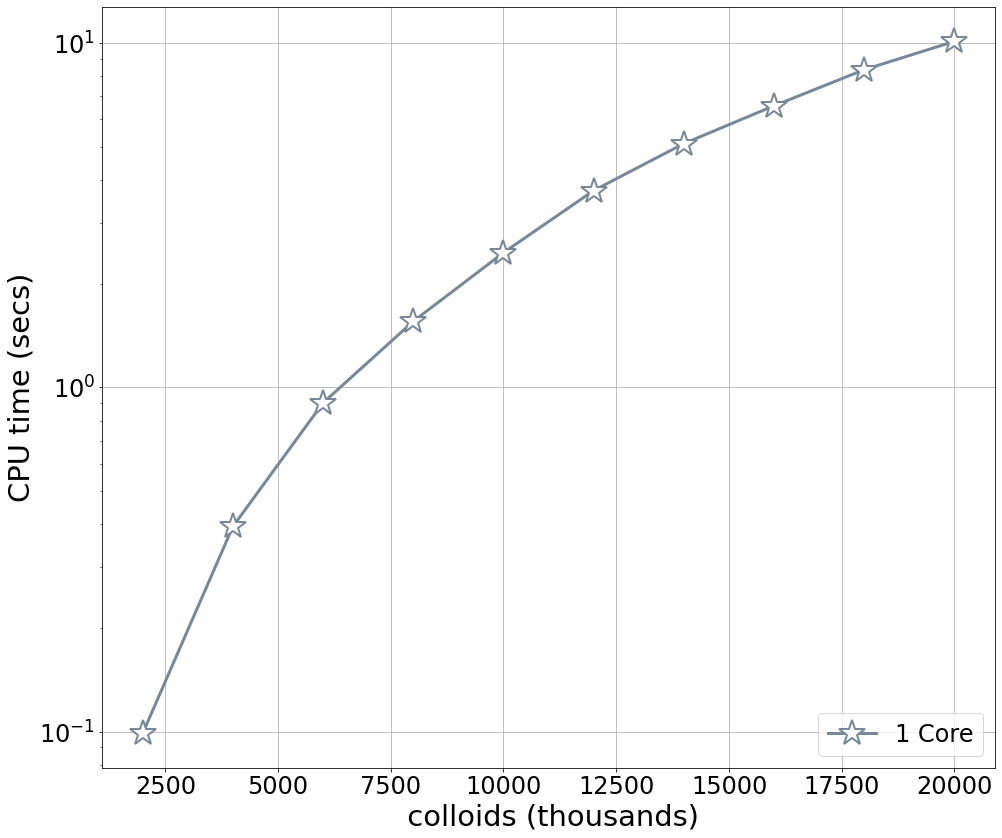

In [4]:
plt.figure(figsize=(16, 14))

mpl.rc('hatch', color='k', linewidth=22.5)
mss=24; plt.xticks(fontsize=mss);   plt.yticks(fontsize=mss)
plt.semilogy(xP, tP1, '-*', ms=mss+3, label="1 Core", lw=3, color='lightslategray', mfc='w', mew=2, alpha=1)
plt.legend(fontsize=mss, loc=4)
plt.xlabel(' colloids (thousands)', fontsize=mss+5)
plt.ylabel('CPU time (secs)', fontsize=mss+5)
plt.grid()

## Plot a precompiled set of benchmarks

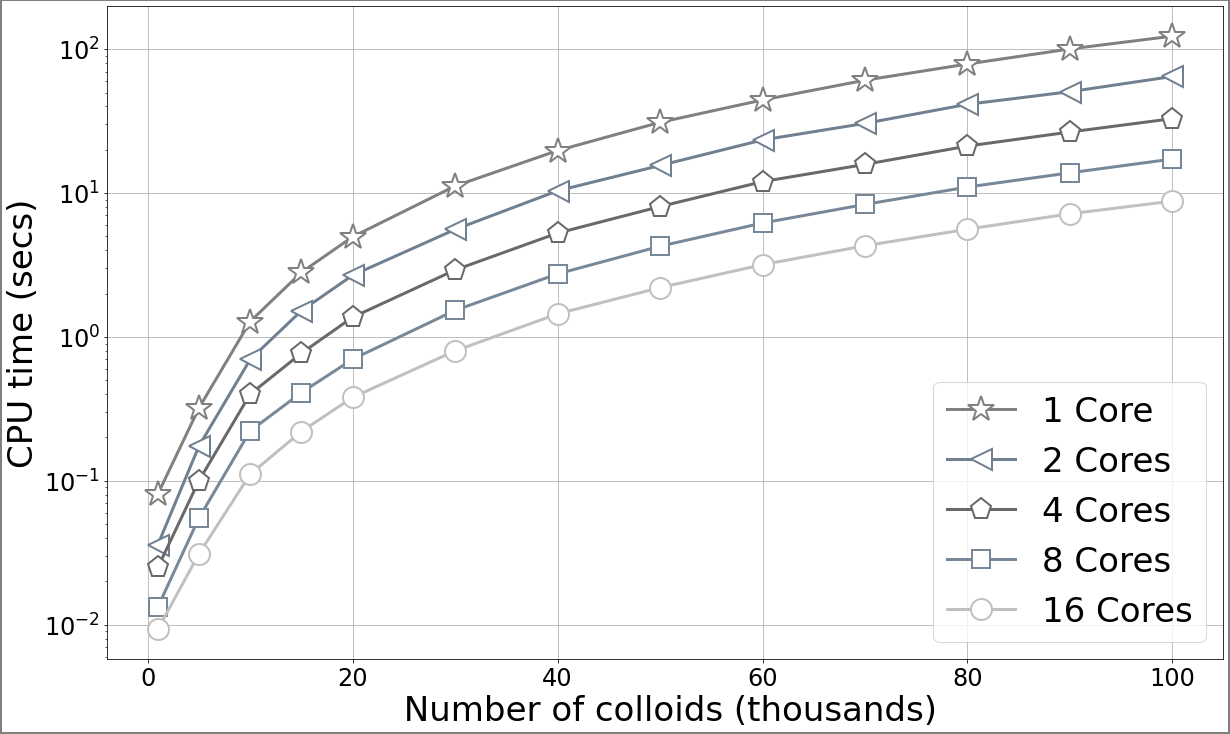

In [5]:
plt.figure(figsize=(20, 12), edgecolor='gray', linewidth=4)
import matplotlib as mpl

mpl.rc('hatch', color='k', linewidth=22.5)

x1= ([1, 5, 10, 15]);  x2=np.arange(20,110,10);   x = np.concatenate((x1, x2))

y1  = ([.081,.32, 1.28, 2.81, 4.968, 11.20, 19.7496, 31.04, 44.41, 60.92, 78.961, 100.524, 123.369]);
y2  = ([.036,.174,.697, 1.52, 2.683, 5.585, 10.374, 15.562, 23.411, 30.523, 41.431, 50.708, 64.685]);
y4  = ([.025,.100,.400, .77,1.371, 2.921, 5.271, 8.060, 12.013, 15.831, 21.226, 26.603, 32.934]);
y8  = ([.0133,.055,.222, .41,0.700, 1.530, 2.743, 4.271, 6.197, 8.341, 11.0167, 13.838, 17.252]);
y16 = ([.0093, .031,.111, .22, 0.380, 0.800, 1.447, 2.202, 3.180, 4.304, 5.609, 7.182, 8.794]);

mss=24; plt.xticks(fontsize=mss);   plt.yticks(fontsize=mss)
plt.semilogy(x, y1, '-*', ms=mss+3, label="1 Core", lw=3, color='gray', mfc='w', mew=2, alpha=1)
plt.semilogy(x, y2, '-<', ms=mss-3, label="2 Cores", lw=3,mfc='w', color='slategray', mew=2)
plt.semilogy(x, y4, '-p', ms=mss-2, label="4 Cores", lw=3, color='dimgray',mfc='w', mew=2)
plt.semilogy(x, y8, '-s', ms=mss-6, label="8 Cores", lw=3,mfc='w', color='lightslategray', mew=2)
plt.semilogy(x, y16, '-o', ms=mss-3, label="16 Cores", lw=3,mfc='w', color='silver', mew=2)
plt.legend(fontsize=mss+10, loc=4)
plt.xlabel(' Number of colloids (thousands)', fontsize=mss+10)
plt.ylabel('CPU time (secs)', fontsize=mss+10)
plt.grid()

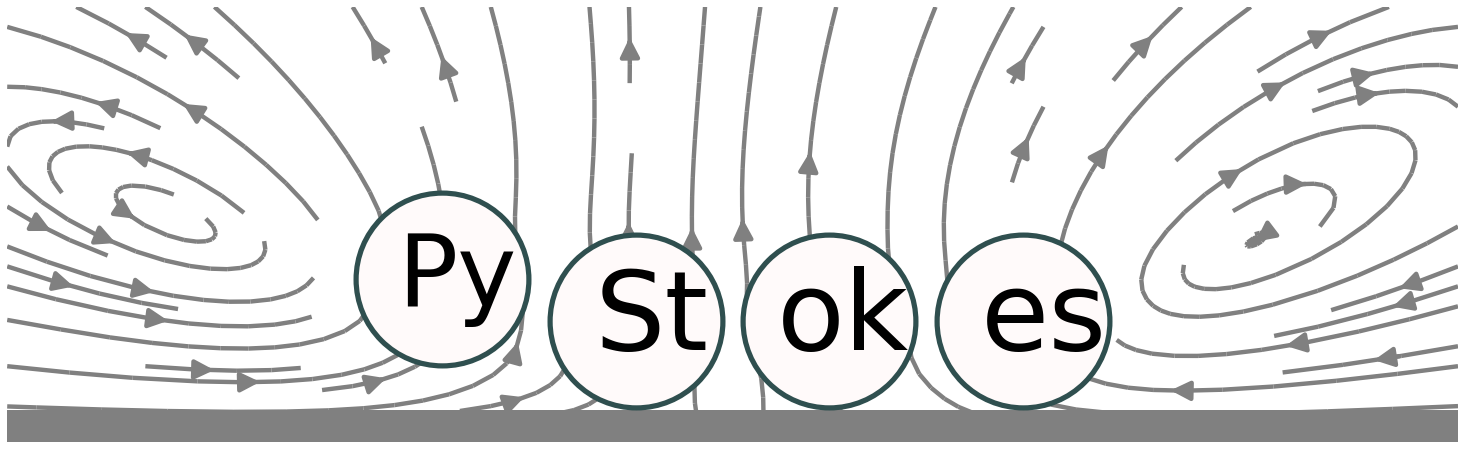

In [6]:
pystokes.utils.plotLogo()